# Machine Learning

In [1]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.data.shape

(150, 4)

In [7]:
iris.target.shape

(150,)

In [8]:
X_train, X_test, y_train, y_test = \
        model_selection.train_test_split(iris.data, iris.target, train_size=0.7)

In [9]:
classifier = linear_model.LogisticRegression()

In [10]:
classifier.fit(X_train, y_train)

/Users/bernardocohen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y_test_pred = classifier.predict(X_test)

In [12]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.94      1.00      0.97        16
           2       1.00      0.95      0.97        19

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [14]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[10,  0,  0],
       [ 0, 16,  0],
       [ 0,  1, 18]])

In [15]:
np.bincount(y_test)

array([10, 16, 19])

In [16]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[10,  0,  0],
       [ 0, 16,  0],
       [ 0,  2, 17]])

In [17]:
train_size_vec = np.linspace(0.1, 0.9, 30)

In [18]:
classifiers = [tree.DecisionTreeClassifier,
               neighbors.KNeighborsClassifier,
               svm.SVC, ensemble.RandomForestClassifier]

In [19]:
cm_diags = np.zeros((3, len(train_size_vec), len(classifiers)),
                   dtype = float)

In [20]:
for n, train_size in enumerate(train_size_vec):
    X_train, X_test, y_train, y_test = \
        model_selection.train_test_split(iris.data, iris.target,
                                            train_size=train_size)
    for m, Classifier in enumerate(classifiers):
        classifier = Classifier()
        classifier.fit(X_train, y_train)
        y_test_p = classifier.predict(X_test)
        cm_diags[:,n,m] = metrics.confusion_matrix(y_test, y_test_p).diagonal()
        cm_diags[:,n,m] /= np.bincount(y_test)

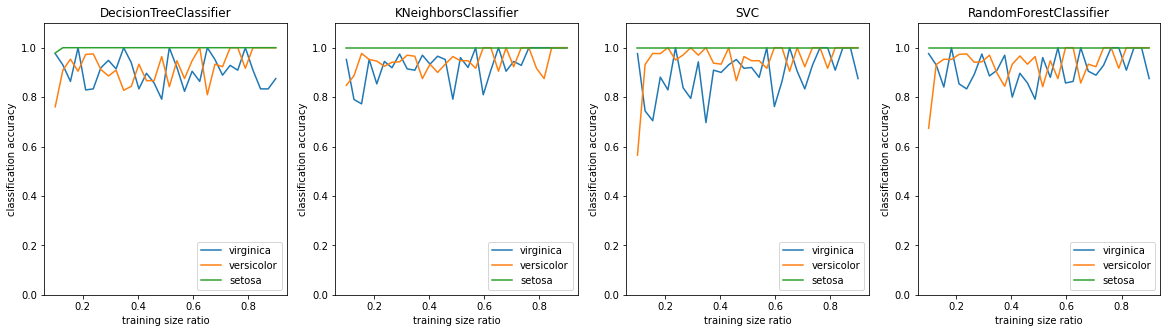

In [24]:
fig, axes = plt.subplots(1, len(classifiers), figsize=(20,5))
for m, Classifier in enumerate(classifiers):
    axes[m].plot(train_size_vec, cm_diags[2,:,m], label=iris.target_names[2])
    axes[m].plot(train_size_vec, cm_diags[1,:,m], label=iris.target_names[1])
    axes[m].plot(train_size_vec, cm_diags[0,:,m], label=iris.target_names[0])
    axes[m].set_title(type(Classifier()).__name__)
    axes[m].set_ylim(0,1.1)
    axes[m].set_ylabel("classification accuracy")
    axes[m].set_xlabel("training size ratio")
    axes[m].legend(loc=4)

In [25]:
X,y = iris.data, iris.target

In [26]:
n_clusters = 3
clustering = cluster.KMeans(n_clusters = n_clusters)

In [27]:
clustering.fit(X)

KMeans(n_clusters=3)

In [28]:
y_pred = clustering.predict(X)

In [29]:
y_pred[::8]

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [30]:
idx_0, idx_1, idx_2 = (np.where(y_pred == n) for n in range(3))
y_pred[idx_0], y_pred[idx_1], y_pred[idx_2] = 2,0,1
y_pred[::8]

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [31]:
metrics.confusion_matrix(y,y_pred)

array([[50,  0,  0],
       [ 0,  2, 48],
       [ 0, 36, 14]])

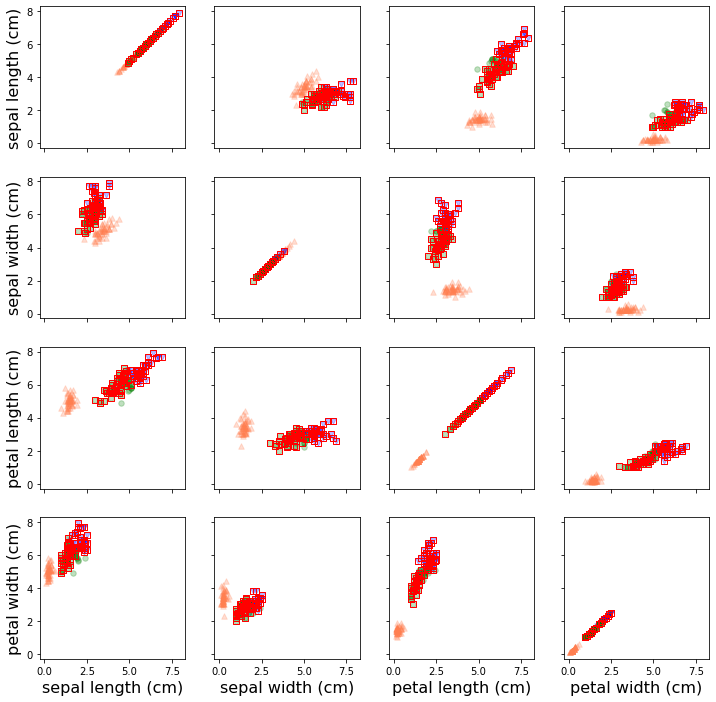

In [32]:
N = X.shape[1]
fig, axes = plt.subplots(N,N,figsize=(12,12), sharex=True,
                        sharey=True)
colors = ["coral", "blue", "green"]
markers = ["^", "v", "o"]
for m in range(N):
    for n in range(N):
        for p in range(n_clusters):
            mask = y_pred == p
            axes[m,n].scatter(X[:,m][mask], X[:,n][mask],
                                s=30, marker=markers[p],color=colors[p],
                             alpha=0.25)
        for idx in np.where(y != y_pred):
            axes[m,n].scatter(X[idx,m], X[idx,n], s=30,
                                marker="s", edgecolor="red",
                             facecolor=(1,1,1,0))
    axes[N-1,m].set_xlabel(iris.feature_names[m], fontsize=16)
    axes[m,0].set_ylabel(iris.feature_names[m], fontsize=16)